In [1]:
import numpy as np
import matplotlib.pyplot as plt 


In [2]:
dims = np.array(['R', 'Lz'])

In [3]:
from galpy.orbit import Orbit


In [4]:
orbitMethods = [method for method in dir(Orbit) if callable(getattr(Orbit, method)) and not method.startswith("__")]

In [5]:
if type(dims) == str:
    print(dims)
else:
    assert type(dims) == np.ndarray, \
        "'dims' must be a string or numpy array of strings"
    assert dims.shape == (2,), \
        f"'dims' must have shape (2,) but it has shape {dims.shape}"
    assert all(item in orbitMethods for item in dims), \
        'All elements of dims must be a method the galpy orbit object: \n' + ', '.join(orbitMethods)

# Initializer

In [6]:
from suiteorbits import varyE_fixLz
from galpy.potential import NFWPotential

In [7]:
from suiteorbits import initializers as init

In [8]:
#from .initializers import varyE_fixLz

In [107]:
E_range = np.array([-0.3, -0.2])
n_orbits = 10
E_list = np.linspace(E_range[0], E_range[1], n_orbits)
pot = NFWPotential()
Lz = pot.LcE(E_list[0])
orbit = varyE_fixLz(E_range, n_orbits, Lz, pot)

In [108]:
r_list = np.linspace(0, 30, 10000)
pot(r_list,0)

array([-1.        , -0.99850284, -0.99701165, ..., -0.11448269,
       -0.11447446, -0.11446624], shape=(10000,))

/tmp/ipykernel_2716026/2750698490.py:1: RuntimeWarning: divide by zero encountered in divide
  r = r_list[np.argmin(np.abs(pot(r_list,0)+ 0.5*(Lz/r_list)**2-E_list[0]))]



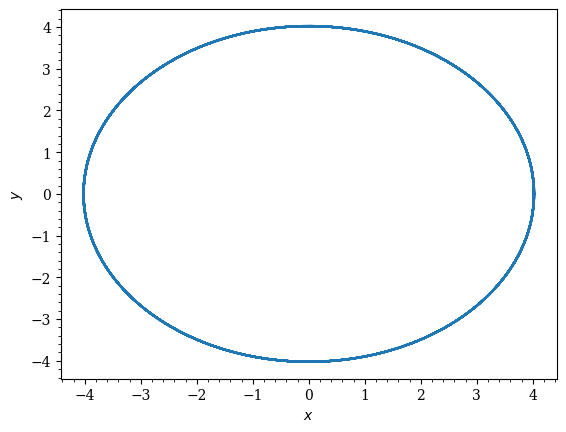

In [109]:
r = r_list[np.argmin(np.abs(pot(r_list,0)+ 0.5*(Lz/r_list)**2-E_list[0]))]
ts = np.linspace(0, 1000, 1000)
orbit = Orbit([r, 0, Lz/r, 0, 0, 0])#varyE_fixLz(E, n_orbits, Lz, pot)
orbit.integrate(ts, pot=pot)
orbit.plot(d1='x', d2='y')

In [110]:
pot.rE(E_list[5])

5.592926495883378

In [111]:
pot.LcE(E_list[5])

np.float64(2.4090745605361774)

In [112]:
Lz/r

np.float64(0.4495088004688828)

In [113]:
pot.vcirc(r)

np.float64(0.44953268882294306)

/tmp/ipykernel_2716026/110881886.py:4: RuntimeWarning: divide by zero encountered in divide
  r = r_list[np.argmin(np.abs(pot(r_list,0)+ 0.5*(Lz/r_list)**2-E))]



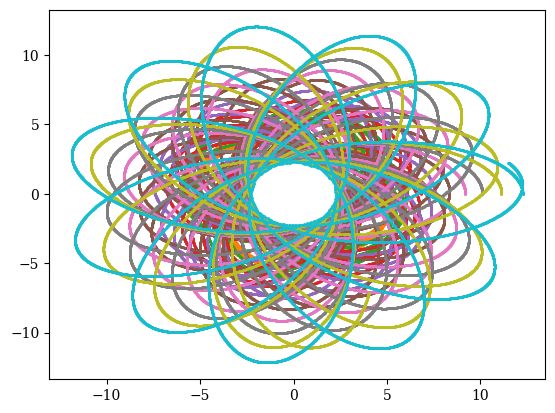

In [114]:
r_list = np.linspace(0, 50, 10000)
ts = np.linspace(0, 1000, 10000)
for E in E_list:
    r = r_list[np.argmin(np.abs(pot(r_list,0)+ 0.5*(Lz/r_list)**2-E))]
    orbit = Orbit([r, 0, Lz/r, 0, 0, 0], )#varyE_fixLz(E, n_orbits, Lz, pot)
    orbit.integrate(ts, pot=pot)
    plt.scatter(orbit.x(ts), orbit.y(ts), s=1)

In [135]:
np.__version__

'2.2.1'

In [136]:
import astropy.units as u

In [116]:
# def varyE_fixLz(E_range, E_res, Lz, potential, _res=int(1e6), r_range=[0.01, 1], **kwargs):
#     '''
#     Initialize n particles with varying energy and the same angular momentum.
    
#     Parameters:
#     ----------
#     E_range : ndarray
#         Range of energies to explodre, in units of km^2/s^2.
#     E_res : int
#         Resolution of the energy list.
#     Lz : float
#         Angular momentum of the energies, in units of kpc km/s
#     potential : galpy.potential.Potential
#         The galpy potential object to use.
#     _res : int
#         Resolution of the radius and energy list. Default is 1e4.
#     **kwargs : dict
#         Additional keyword arguments to pass to the Orbit object.
    
#     Returns:
#     -------
#     Orbit
#         An Orbit object with n particles initialized at apocenter with varying energy and the same angular momentum.

#     Notes:
#     -----
#     Particles are initialized at apocenter and tangential velocity in only one direction.
#     Assumes a spherically symmetric potential.

#     Needed:
#     ------
#     * Add way to automate the resolution of the radius and energy lists.
#     * Add way to automate the radius range, resolution, and scaling.
#     * Add way to automate the energy resolution and scaling.

#     '''
#     r_list = np.linspace(r_range[0], r_range[1], _res) # list of radii at which the potential is calculated
#     E_list = np.linspace(E_range[0], E_range[1], E_res)# list of energies to explore

#     r_apo_ind_list = [np.argmin(np.abs(potential(r_list, 0) + (0.5 * Lz**2 / r_list**2) - _E)) for _E in E_list] # list of r_list indices associated with apocenter of orbit of each E and given Lz.
#     r = r_list[r_apo_ind_list]
#     print(E_list)
#     vT = Lz / r
#     return Orbit([[r[i], 0, vT[i]] for i in range(0, len(E_list))]) # [R,vR,vT(,z,vz,phi)]

Text(0, 0.5, '$U_{eff}$')

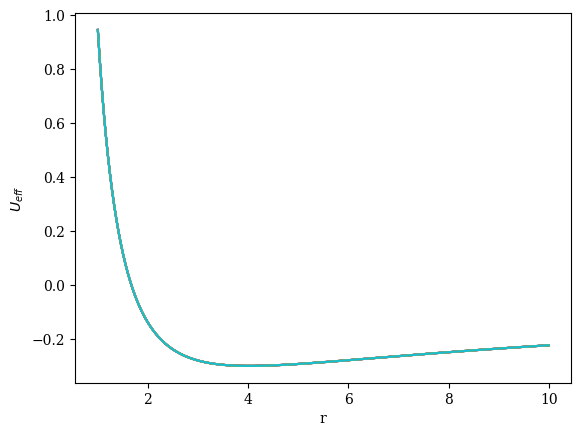

In [117]:
r_range = [1, 10]
_res = int(1e6)


r_list = np.linspace(r_range[0], r_range[1], _res) # list of radii at which the potential is calculated
for _E in E_list:
    plt.plot(r_list, pot(r_list, 0) + (0.5 * Lz**2 / r_list**2))
plt.xlabel('r')
plt.ylabel('$U_{eff}$')

Text(0, 0.5, '$U_{eff}$ - E')

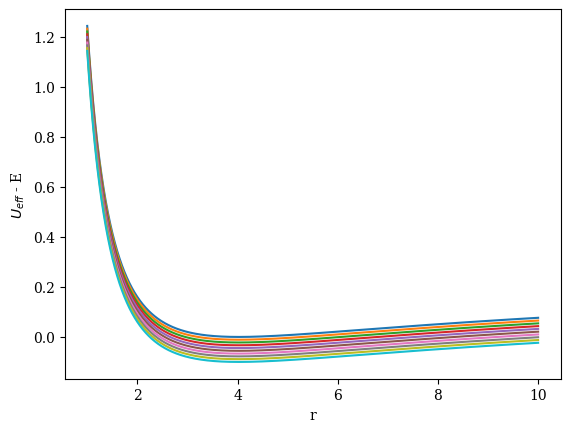

In [118]:
r_list = np.linspace(r_range[0], r_range[1], _res) # list of radii at which the potential is calculated
for _E in E_list:
    plt.plot(r_list, pot(r_list, 0) + (0.5 * Lz**2 / r_list**2) - _E)
plt.xlabel('r')
plt.ylabel('$U_{eff}$ - E')

pericenter and apocenter occur when U_eff = E

Text(0, 0.5, '|$U_{eff}$ - E|')

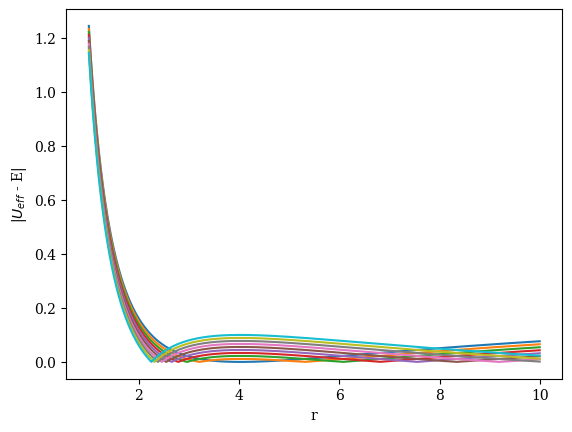

In [119]:
r_list = np.linspace(r_range[0], r_range[1], _res) # list of radii at which the potential is calculated
for _E in E_list:
    plt.plot(r_list, np.abs(pot(r_list, 0) + (0.5 * Lz**2 / r_list**2) - _E))
plt.xlabel('r')
plt.ylabel('|$U_{eff}$ - E|')

First minimum is pericenter, second is apocenter

It looks like you can't have an orbit with an angular momentum that is associated with an circular orbit of higher energy? Rather, I think the real issue is that I chose an Lz 

In [120]:
E_res = 10

orbit_out = varyE_fixLz(E_range, E_res, Lz, pot)

In [121]:
E_range

array([-0.3, -0.2])

In [122]:
orbit_out.vr()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [123]:
orbit_out.r()

array([ 4.02615063,  5.30564596,  6.069094  ,  6.79929866,  7.54590006,
        8.3334433 ,  9.18007479, 10.10289111, 11.12008865,  2.24835448])

In [124]:
orbit_out.Lz()

array([1.80990342, 1.80990342, 1.80990342, 1.80990342, 1.80990342,
       1.80990342, 1.80990342, 1.80990342, 1.80990342, 1.80990342])

In [125]:
orbit.E(pot=pot)

np.float64(-0.20001259126723978)

In [126]:
result = np.abs(orbit_out.E(pot=pot) - np.linspace(E_range[0], E_range[1], E_res))
all_less_than_threshold = np.all(result < 1e-5)
print(all_less_than_threshold)

True


In [127]:
ts = np.linspace(0, 100, 10000)
orbit_out.integrate(ts, pot)

In [128]:
orbit_out.r(ts)

array([[ 4.02615063,  4.02615063,  4.02615063, ...,  4.02617249,
         4.0261725 ,  4.02617251],
       [ 5.30564596,  5.30564528,  5.30564324, ...,  4.70552649,
         4.70432397,  4.70312046],
       [ 6.069094  ,  6.06909324,  6.06909097, ...,  6.01855639,
         6.01816473,  6.01777156],
       ...,
       [10.10289111, 10.10289054, 10.10288881, ...,  5.95885996,
         5.955476  ,  5.95209053],
       [11.12008865, 11.12008813, 11.12008657, ...,  9.27098473,
         9.26893053,  9.26687508],
       [ 2.24835448,  2.24836408,  2.2483929 , ...,  5.97428701,
         5.97826683,  5.98224515]], shape=(10, 10000))

In [129]:
orbit_out.r(ts).shape

(10, 10000)

In [130]:
orbit_out.E(ts, pot=pot)

array([[-0.3       , -0.3       , -0.3       , ..., -0.3       ,
        -0.3       , -0.3       ],
       [-0.28888871, -0.28888871, -0.28888871, ..., -0.28888871,
        -0.28888871, -0.28888871],
       [-0.27777801, -0.27777801, -0.27777801, ..., -0.27777801,
        -0.27777801, -0.27777801],
       ...,
       [-0.22222214, -0.22222214, -0.22222214, ..., -0.22222214,
        -0.22222214, -0.22222214],
       [-0.21111113, -0.21111113, -0.21111113, ..., -0.21111113,
        -0.21111113, -0.21111113],
       [-0.20000016, -0.20000016, -0.20000016, ..., -0.20000016,
        -0.20000016, -0.20000016]], shape=(10, 10000))

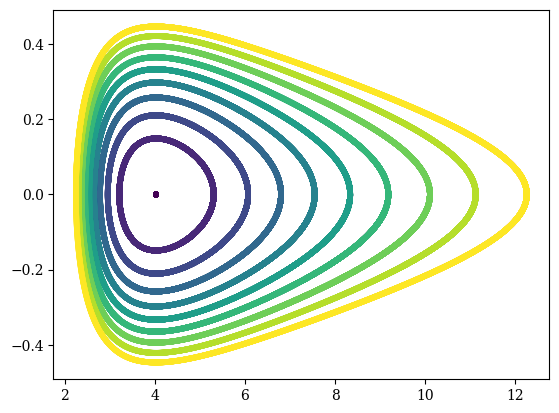

In [134]:
plt.scatter(orbit_out.r(ts), orbit_out.vR(ts), c=orbit_out.E(ts, pot=pot), s=10)

In [132]:
result

array([1.81760162e-12, 1.79184599e-07, 2.35692406e-07, 1.96985298e-07,
       2.66341382e-09, 2.81350954e-07, 1.54356907e-07, 8.25024551e-08,
       2.37102002e-08, 1.59885696e-07])

In [36]:
result

array([1.66666667e-01, 1.33333333e-01, 1.00000000e-01, 6.66666667e-02,
       3.33333333e-02, 8.53095372e-13, 9.61449970e-08, 8.07334940e-08,
       2.42360696e-07, 5.81435303e-09])

In [37]:
orbit_o

NameError: name 'orbit_o' is not defined

In [ ]:
pot(10, 0)

TypeError: Potential.__call__() got an unexpected keyword argument 'physical_units'

In [ ]:
_res = int(1e4)
Lz = 1.0 * u.kpc * u.km/u.s
r_list = np.linspace(0.01, 50, _res) *u.kpc# list of radii at which the potential is calculated
E_list = np.linspace(E_range[0], E_range[1], _res) * u.km**2/u.s**2 # list of energies to explore

r_apo_ind_list = [np.argmin(pot(r_list, 0) + (0.5 * Lz**2 / r_list**2) - _E) for _E in E_list] # list of r_list indices associated with apocenter of orbit of each E and given Lz.
r = r_list[r_apo_ind_list]
vT = Lz / r

UnitConversionError: Can only apply 'add' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan).

In [ ]:
[[r[i], 0*u.km/u.s, vT[i]] for i in range(0, len(E_list))]

[[np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64(1.0000990197049213)],
 [np.float64(0.9999009900990099),
  <Quantity 0. km / s>,
  np.float64

In [ ]:
Orbit([[r[i], 0*u.km/u.s, vT[i]] for i in range(0, len(E_range))])

IndexError: invalid index to scalar variable.

In [ ]:
L_range = 0.5 * (Lz**2 / r_range**2)

In [ ]:
pot(r_range, 0) + 0.5 * (Lz**2 / r_range**2) - E_range

ValueError: operands could not be broadcast together with shapes (10000,) (2,) 

In [ ]:
np.array([[0, 2], [1,3], [1,3]]).shape

(3, 2)

In [ ]:
all(isinstance(item, str) for item in dims)

True

In [ ]:
Orbit

In [ ]:
methods

['E',
 'ER',
 'Ez',
 'Jacobi',
 'L',
 'LcE',
 'Lz',
 'Op',
 'Or',
 'Oz',
 'R',
 'SOS',
 'SkyCoord',
 'Tp',
 'Tr',
 'TrTp',
 'Tz',
 'U',
 'V',
 'W',
 '_base_plotSOS',
 '_call_internal',
 '_check_method_c_compatible',
 '_check_method_dissipative_compatible',
 '_from_slice',
 '_parse_plot_quantity',
 '_setupOrbitInterp',
 '_setup_EccZmaxRperiRap',
 '_setup_actions',
 '_setup_actionsFreqsAngles',
 '_setup_parse_coordtransform',
 '_setup_parse_listofOrbits',
 '_setup_parse_vxvv',
 '_setupaA',
 'animate',
 'animate3d',
 'bb',
 'bruteSOS',
 'check_integrator',
 'dec',
 'dim',
 'dist',
 'e',
 'flip',
 'from_fit',
 'from_name',
 'getOrbit',
 'getOrbit_dxdv',
 'helioX',
 'helioY',
 'helioZ',
 'integrate',
 'integrate_SOS',
 'integrate_dxdv',
 'jp',
 'jr',
 'jz',
 'll',
 'phasedim',
 'phi',
 'plot',
 'plot3d',
 'plotBruteSOS',
 'plotSOS',
 'pmbb',
 'pmdec',
 'pmll',
 'pmra',
 'r',
 'rE',
 'ra',
 'rap',
 'reshape',
 'rguiding',
 'rperi',
 'theta',
 'time',
 'toLinear',
 'toPlanar',
 'turn_physical

In [ ]:
dims[1]

'8'

In [ ]:
isinstance(dims[1], str)

True

In [ ]:
assert all(isinstance(item, str) for item in dims), 'All elements of dims must be strings'

In [ ]:
expected_shape = (3,)  # Replace with the expected shape
assert dims.shape == expected_shape, f'Expected shape {expected_shape}, but got {dims.shape}'

In [35]:
class Animal:
    def __init__(self, name, species, **kwargs):
        self.name = name
        self.species = species
        self.fixed_arg = kwargs


In [36]:
this_animal = Animal('dog', 'canine', sound='bark')

In [37]:
this_animal.fixed_arg

{'sound': 'bark'}

In [39]:
assert 'sound' in this_animal.fixed_arg, 'sound not in fixed_arg'

In [ ]:
class Suite():
    '''
    Suite class for exploring n parameters.
    '''
    def __init__(self, dims, dim_ranges, dim_steps, **kwargs):

In [40]:
from galpy.potential import NFWPotential
nfw = NFWPotential()

In [ ]:
assert type(nfw) 

galpy.potential.TwoPowerSphericalPotential.NFWPotential

In [44]:
nfw.__class__

galpy.potential.TwoPowerSphericalPotential.NFWPotential

In [46]:
import galpy

In [ ]:
# Get all potential classes from galpy.potential
potential_classes = [cls for cls in dir(galpy.potential) if isinstance(getattr(galpy.potential, cls), type)]

# Filter to only include classes that are likely to be potentials
pot_classes = []
for cls_name in potential_classes:
    cls = getattr(galpy.potential, cls_name)
    # Check if this appears to be a potential class (has methods common in potentials)
    if hasattr(cls, "__call__") and hasattr(cls, "__init__"):
        pot_classes.append(cls_name)

print(f"Found {len(pot_classes)} potential classes in galpy.potential:")
for i, pot_name in enumerate(sorted(pot_classes)):
    print(f"{i+1}. {pot_name}")

<module 'galpy.potential' from '/geir_data/scr/gabrielspace/miniforge3/envs/ML_Dyn/lib/python3.12/site-packages/galpy/potential/__init__.py'>

In [ ]:
dir(galpy.potential)

['AdiabaticContractionWrapperPotential',
 'AnyAxisymmetricRazorThinDiskPotential',
 'AnySphericalPotential',
 'BurkertPotential',
 'ChandrasekharDynamicalFrictionForce',
 'CorotatingRotationWrapperPotential',
 'CosmphiDiskPotential',
 'DehnenBarPotential',
 'DehnenCoreSphericalPotential',
 'DehnenSmoothWrapperPotential',
 'DehnenSphericalPotential',
 'DiskSCFPotential',
 'DissipativeForce',
 'DoubleExponentialDiskPotential',
 'EllipsoidalPotential',
 'EllipticalDiskPotential',
 'FerrersPotential',
 'FlattenedPowerPotential',
 'Force',
 'GaussianAmplitudeWrapperPotential',
 'HenonHeilesPotential',
 'HernquistPotential',
 'HomogeneousSpherePotential',
 'InterpSnapshotRZPotential',
 'IsochronePotential',
 'IsothermalDiskPotential',
 'JaffePotential',
 'KGPotential',
 'KeplerPotential',
 'KingPotential',
 'KuzminDiskPotential',
 'KuzminKutuzovStaeckelPotential',
 'KuzminLikeWrapperPotential',
 'LcE',
 'LinShuReductionFactor',
 'LogarithmicHaloPotential',
 'LopsidedDiskPotential',
 'MN3Expo

In [49]:
assert nfw in dir(galpy.potential)

AssertionError: 

In [50]:
from galpy.potential import Potential

# Check if nfw is an instance of galpy.potential.Potential

# For direct instance check
is_instance = isinstance(nfw, Potential)
print(f"Is nfw an instance of Potential? {is_instance}")

# For class/subclass relationship check
is_subclass = issubclass(nfw.__class__, Potential)
print(f"Is nfw's class a subclass of Potential? {is_subclass}")

# Checking this_animal as another example
is_animal_instance = isinstance(this_animal, Animal)
print(f"Is this_animal an instance of Animal? {is_animal_instance}")

Is nfw an instance of Potential? True
Is nfw's class a subclass of Potential? True
Is this_animal an instance of Animal? True


In [52]:
isinstance(nfw, galpy.potential.Potential.SphericalPotential)

AttributeError: type object 'Potential' has no attribute 'SphericalPotential'

In [56]:
# Get all direct subclasses of Potential
direct_subclasses = galpy.potential.Potential.__subclasses__()

# Print the direct subclasses
print(f"Direct subclasses of galpy.potential.Potential ({len(direct_subclasses)}):")
for i, subcls in enumerate(direct_subclasses):
    print(f"{i+1}. {subcls.__name__}")

# Get all descendant subclasses (recursive)
all_subclasses = []

def get_all_subclasses(cls):
    all_subs = cls.__subclasses__()
    for sub in all_subs:
        all_subclasses.append(sub)
        get_all_subclasses(sub)

get_all_subclasses(galpy.potential.Potential)

print(f"\nAll subclasses of galpy.potential.Potential ({len(all_subclasses)}):")
for i, subcls in enumerate(sorted(all_subclasses, key=lambda x: x.__name__)):
    print(f"{i+1}. {subcls.__name__}")

Direct subclasses of galpy.potential.Potential (30):
1. SphericalPotential
2. AnyAxisymmetricRazorThinDiskPotential
3. WrapperPotential
4. DehnenBarPotential
5. SCFPotential
6. DiskSCFPotential
7. DoubleExponentialDiskPotential
8. FerrersPotential
9. FlattenedPowerPotential
10. HomogeneousSpherePotential
11. IsochronePotential
12. KuzminDiskPotential
13. KuzminKutuzovStaeckelPotential
14. LogarithmicHaloPotential
15. MiyamotoNagaiPotential
16. MN3ExponentialDiskPotential
17. PlummerPotential
18. MovingObjectPotential
19. NullPotential
20. EllipsoidalPotential
21. PowerSphericalPotential
22. PowerSphericalPotentialwCutoff
23. PseudoIsothermalPotential
24. RazorThinExponentialDiskPotential
25. RingPotential
26. interpRZPotential
27. SnapshotRZPotential
28. SoftenedNeedleBarPotential
29. SpiralArmsPotential
30. TwoPowerSphericalPotential

All subclasses of galpy.potential.Potential (52):
1. AdiabaticContractionWrapperPotential
2. AnyAxisymmetricRazorThinDiskPotential
3. AnySphericalPotent

In [ ]:
from galpy.potential import SphericalPotential

def is_spherical_potential(potential):
    """
    Check if a potential is spherically symmetric.
    
    Parameters:
    ----------
    potential : instance of galpy.potential.Potential
        The potential to check.
    
    Returns:
    -------
    bool
        True if the potential is spherically symmetric, False otherwise.
    """
    # Check if the potential is an instance of SphericalPotential
    is_spherical = isinstance(potential, SphericalPotential)
    
    return is_spherical

# Example usage with the NFW potential:
print(f"Is NFW potential spherically symmetric? {is_spherical_potential(nfw)}")

# You can also get the class name for better context
potential_class_name = nfw.__class__.__name__
print(f"The potential is of class: {potential_class_name}")

# To check the inheritance chain (for debugging)
def print_inheritance_chain(cls):
    chain = []
    current = cls
    while current is not object:
        chain.append(current.__name__)
        current = current.__mro__[1]
    return ' -> '.join(chain)

print(f"Inheritance chain: {print_inheritance_chain(nfw.__class__)}")

In [ ]:
def is_spherical(potential):
    """
    Check if a potential is spherically symmetric.
    
    Parameters:
    ----------
    potential : galpy potential instance
        The potential to check.
    
    Returns:
    -------
    bool
        True if the potential is spherically symmetric, False otherwise.
    """
    # Method 1: Direct class check
    if isinstance(potential, SphericalPotential):
        return True
    
    # Method 2: Check class name (catches spherical potentials that might not inherit from SphericalPotential)
    class_name = potential.__class__.__name__
    if "Spherical" in class_name:
        return True
    
    # Method 3: Check the inheritance chain
    mro = potential.__class__.__mro__
    for cls in mro:
        if cls.__name__ == "SphericalPotential":
            return True
            
    # If none of the above, check if NFWPotential specifically
    if isinstance(potential, galpy.potential.TwoPowerSphericalPotential.NFWPotential):
        return True
        
    return False

# Example usage
print(f"Is NFW potential spherically symmetric? {is_spherical(nfw)}")

In [ ]:
galpy.potential.SphericalPotential.SphericalPotential

<function galpy.potential.Potential.Potential.LcE(self, E, t=0.0)>

In [62]:
hasattr(nfw, 'Lz')

False

In [63]:
nfw.LcE()

TypeError: Potential.LcE() missing 1 required positional argument: 'E'

In [68]:
from galpy.orbit import Orbit

In [71]:
hasattr(Orbit, 'Lz')

True